In [44]:
import rasterio
from pathlib import Path
from rasterio.crs import CRS
from rasterio.merge import merge
from rasterio.plot import show
from matplotlib.colors import ListedColormap
import numpy as np

In [45]:
slc_id = 'S1B_IW_SLC__1SDV_20211212T002818_20211212T002836_029985_03946A_6D2A'

In [46]:
out_dir = Path("out") / slc_id
out_dir.exists()

True

In [47]:
wtr_prod_paths = list((out_dir / 'sas' ).glob('*_WTR.tif'))
len(wtr_prod_paths), wtr_prod_paths[:2]

(12,
 [PosixPath('out/S1B_IW_SLC__1SDV_20211212T002818_20211212T002836_029985_03946A_6D2A/sas/OPERA_L3_DSWx-S1_T14SNG_20211212T002820Z_20231018T115050Z_S1B_30_vNone_B02_WTR.tif'),
  PosixPath('out/S1B_IW_SLC__1SDV_20211212T002818_20211212T002836_029985_03946A_6D2A/sas/OPERA_L3_DSWx-S1_T14SMF_20211212T002820Z_20231018T115050Z_S1B_30_vNone_B02_WTR.tif')])

In [48]:
def get_crs(wtr_path: Path):
    with rasterio.open(wtr_path) as ds:
        crs = ds.crs
    return crs

crs_wtrs = list(map(get_crs, wtr_prod_paths))
crs_wtrs

[CRS.from_epsg(32614),
 CRS.from_epsg(32614),
 CRS.from_epsg(32614),
 CRS.from_epsg(32614),
 CRS.from_epsg(32614),
 CRS.from_epsg(32614),
 CRS.from_epsg(32614),
 CRS.from_epsg(32614),
 CRS.from_epsg(32614),
 CRS.from_epsg(32615),
 CRS.from_epsg(32615),
 CRS.from_epsg(32614)]

In [49]:
with rasterio.open(wtr_prod_paths[0]) as ds:
    colormap = ds.colormap(1)

In [ ]:
# Source: https://stackoverflow.com/a/1518632
def most_common_item(lst):
    return max(set(lst), key=

In [50]:
wtr_prod_paths_f = [p for p in wtr_prod_paths if get_crs(p) == CRS.from_epsg(32614)] 
len(wtr_prod_paths_f)

10

In [58]:
X, trans = merge(wtr_prod_paths_f)

In [59]:
cmap = ListedColormap([np.array(colormap[key]) / 255 for key in range(256)])

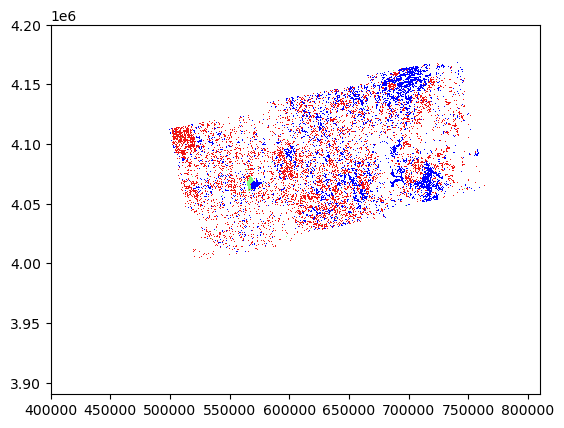

<Axes: >

In [61]:
show(X, transform=trans, cmap=cmap, vmin=0, vmax=255, interpolation='none')